In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
#step 1 : load and review the data
df = pd.read_csv("/Users/momwenga/Desktop/NUX/BAN 6800/LG Customer Data.csv")

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Step 2: Data Cleaning and Preprocessing
# Encode categorical columns (if any)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 0 for Female, 1 for Male



In [9]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [10]:
# Split the data into training and test datasets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)


In [12]:
# Step 3: Model Development
# For this example, we'll use K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Assign clusters to the original data based on the full dataset for evaluation purposes
df['Cluster'] = kmeans.predict(scaled_features)

In [13]:

# Step 4: Evaluate Model Performance
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_train, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Step 4.1: K-Validation
k_values = range(2, 11)  # Testing k from 2 to 10
silhouette_scores = []
calinski_harabasz_scores = []

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_train)
    labels = kmeans_test.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, labels))

Silhouette Score: 0.41940649770537275
Calinski-Harabasz Index: 100.4899669054059


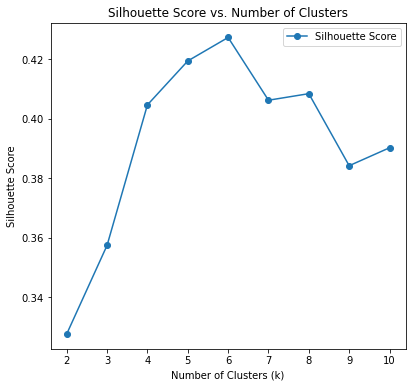

In [14]:
# Plot the metrics for different k values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

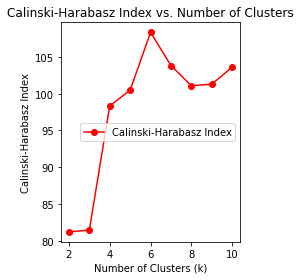

In [15]:
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='r', label='Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()

plt.tight_layout()
plt.show()

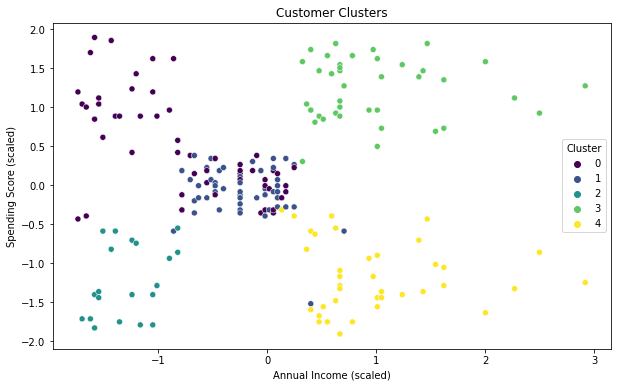

In [17]:
# Step 5: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 1], y=scaled_features[:, 2],
    hue=df['Cluster'], palette='viridis', legend='full'
)
plt.title('Customer Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [18]:
# Step 6: Save the model for deployment
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler have been saved for deployment.")

Model and scaler have been saved for deployment.
